The following recipe illustrates how to simulate mercury intrusion porosimetry on an image using the ``porosimetry`` filter.  The PoreSpy implementation is equivalent to 'morphological image opening' of [Hilpert et al](https://www.sciencedirect.com/science/article/pii/S0309170800000567?via%3Dihub).  PoreSpy's implementation uses distance transforms instead of morphological operations so it is generally faster, especially for larger sphere sizes since binary opening slows down with larger structuring elements.

Start by importing the necessary packages

In [1]:
import porespy as ps
import matplotlib.pyplot as plt

Generate an artificial 2D image for illustration purposes:

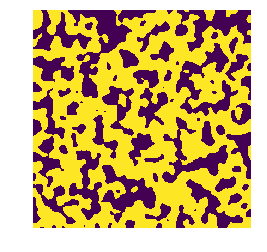

In [2]:
im = ps.generators.blobs(shape=[400, 400], porosity=0.6, blobiness=2)
plt.imshow(im)
plt.axis('off')
plt.show()

Apply the ``porosimetry`` filter to the image both with and without ``access_limited`` applied:

  0%|                                                   | 0/25 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\skimage\segmentation\_clear_border.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True
C:\ProgramData\Anaconda3\lib\site-packages\skimage\segmentation\_clear_border.py:60: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True
100%|██████████████████████████████████████████| 25/25 [00:00<00:00, 75.30it/s]


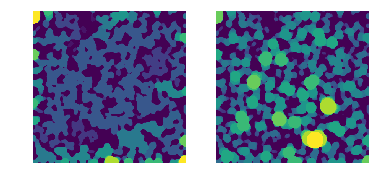

In [3]:
mip = ps.filters.porosimetry(im, access_limited=True)
local_t = ps.filters.porosimetry(im, access_limited=False)
plt.subplot(1, 2, 1)
plt.imshow(mip)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(local_t)
plt.axis('off')
plt.show()

Finally, the images produced by the filter can be passed to the ``pore_size_distribution`` function in the ``metrics`` module to produce numerical data of the pore volume vs. sphere radius:

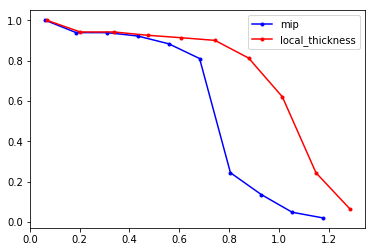

In [4]:
mip_data = ps.metrics.pore_size_distribution(mip)
local_t_data = ps.metrics.pore_size_distribution(local_t)
plt.plot(mip_data.logR, mip_data.cdf, 'b.-', label='mip')
plt.plot(local_t_data.logR, local_t_data.cdf, 'r.-', label='local_thickness')
plt.legend()
plt.show()